# Text Analysis of Amazon Grocery_and_Gourmet_Food Product Reviews.

##### Name : Manimadhuri Edara
##### GitHub profile: https://github.com/MANIMADHURIE
##### LinkedIn progile: https://www.linkedin.com/in/manimadhuriedara/

The Amazon Grocery_and_Gourmet_Food Reviews dataset consists of reviews of Grocery_and_Gourmet foods from Amazon. The data span a period of more than 10 years, including all ~500,000 reviews. Reviews include product and user information, ratings, and a plaintext review.

<img src="https://assets.aboutamazon.com/dims4/default/e1f08b0/2147483647/strip/true/crop/1279x720+0+0/resize/1320x743!/format/webp/quality/90/?url=https%3A%2F%2Famazon-blogs-brightspot.s3.amazonaws.com%2Ff5%2F9f%2F43fe106c4a5081e7a696ef0a8fa8%2Ffresh-1280x7201.jpg" width="600">

##### Source of the Dataset : https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/

##### Necessary frameworks

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from tabulate import tabulate
import seaborn as sns
import os
from nltk.stem.porter import PorterStemmer
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn.manifold import TSNE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import warnings
import pandas_profiling as pdp
warnings.filterwarnings('ignore')

## **Data Cleaning & Analysis**

In [27]:
def explore_dataset(data, data_filename=None):
    """
    In explore_dataset function we are doing all the things that given below:
    - checking shape of dataset
    - checking column names that exist in dataset
    - checking null values 
    - checking overall information about dataset using info() method
    - checking dtypes of columns
    """
    print("="*100)
    print("\t\t\tEDA Dataset: {}".format(data_filename))
    print("="*100)
    
    print("Total Rows: {}".format(data.shape[0]))
    print("\nTotal Columns: {}".format(data.shape[1]))
    print("\nColumns: {}".format(data.columns.tolist()))
    print("\nTotal Null Values: {}".format(data.isnull().sum().sum()))
    print(data.isnull().sum())
    print(" ")
    print("\t\tOverall Information about Dataset\n")
    print(data.info())
    print(" ")
    print("\t\tDtype of all Columns\n")
    print(data.dtypes)

In [28]:
filename = r"C:\Users\edara\OneDrive\Desktop\Data606\dataset_Grocery_and_Gourmet_Food.csv"
df = pd.read_csv(filename)

In [29]:
# lets check the information of dataset
explore_dataset(df,filename)

			EDA Dataset: C:\Users\edara\OneDrive\Desktop\Data606\dataset_Grocery_and_Gourmet_Food.csv
Total Rows: 151254

Total Columns: 9

Columns: ['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText', 'overall', 'summary', 'unixReviewTime', 'reviewTime']

Total Null Values: 1515
reviewerID           0
asin                 0
reviewerName      1493
helpful              0
reviewText          22
overall              0
summary              0
unixReviewTime       0
reviewTime           0
dtype: int64
 
		Overall Information about Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151254 entries, 0 to 151253
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   reviewerID      151254 non-null  object 
 1   asin            151254 non-null  object 
 2   reviewerName    149761 non-null  object 
 3   helpful         151254 non-null  object 
 4   reviewText      151232 non-null  object 
 5   overall         15125

In [30]:
print(df.shape)

(151254, 9)


In [31]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1VEELTKS8NLZB,616719923X,Amazon Customer,"[0, 0]",Just another flavor of Kit Kat but the taste i...,4.0,Good Taste,1370044800,"06 1, 2013"
1,A14R9XMZVJ6INB,616719923X,amf0001,"[0, 1]",I bought this on impulse and it comes from Jap...,3.0,"3.5 stars, sadly not as wonderful as I had hoped",1400457600,"05 19, 2014"
2,A27IQHDZFQFNGG,616719923X,Caitlin,"[3, 4]",Really good. Great gift for any fan of green t...,4.0,Yum!,1381190400,"10 8, 2013"
3,A31QY5TASILE89,616719923X,DebraDownSth,"[0, 0]","I had never had it before, was curious to see ...",5.0,Unexpected flavor meld,1369008000,"05 20, 2013"
4,A2LWK003FFMCI5,616719923X,Diana X.,"[1, 2]",I've been looking forward to trying these afte...,4.0,"Not a very strong tea flavor, but still yummy ...",1369526400,"05 26, 2013"


In [32]:
print("\nDtype of all Columns")
print(df.dtypes)


Dtype of all Columns
reviewerID         object
asin               object
reviewerName       object
helpful            object
reviewText         object
overall           float64
summary            object
unixReviewTime      int64
reviewTime         object
dtype: object


In [33]:
df.isnull().sum()

reviewerID           0
asin                 0
reviewerName      1493
helpful              0
reviewText          22
overall              0
summary              0
unixReviewTime       0
reviewTime           0
dtype: int64

In [34]:
# Check for missing values
total_missing = df.isnull().sum()

In [35]:
# Display the columns with missing values
print("Columns with Missing Values:")
print(total_missing[total_missing > 0])

Columns with Missing Values:
reviewerName    1493
reviewText        22
dtype: int64


In [36]:
df['reviewerName'].fillna('Unknown', inplace=True)
df['reviewText'].fillna('No review available', inplace=True)

In [37]:
df.isnull().sum()

reviewerID        0
asin              0
reviewerName      0
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
dtype: int64

In [38]:
Overall_rating = df['overall'].value_counts().reset_index()
Overall_rating

,index,overall
0,5.0,87446
1,4.0,32598
2,3.0,17514
3,2.0,7917
4,1.0,5779


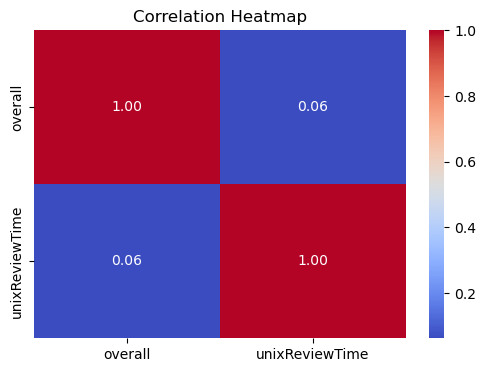

In [39]:
# Display correlation heatmap for numeric columns
corr_matrix = df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

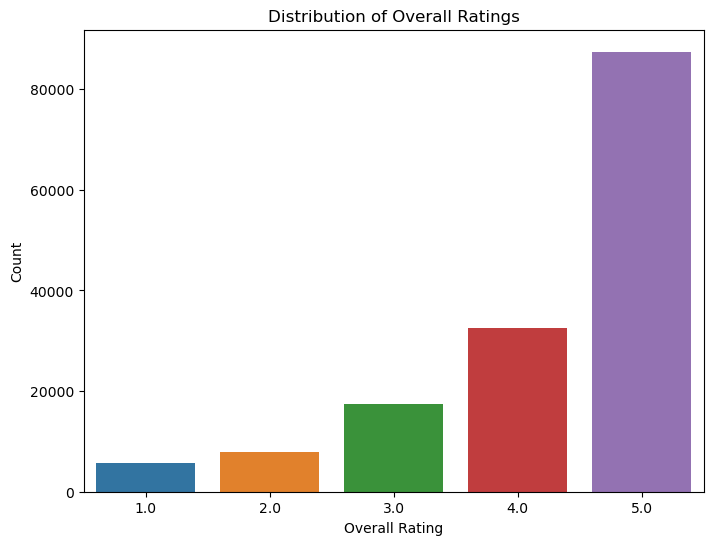

In [40]:
# Visualize the distribution of 'overall' ratings
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='overall')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show()